In [ ]:
from keras.models import Model
from keras.layers import Input,Conv2D, Conv3D, MaxPooling3D,UpSampling2D, UpSampling3D,MaxPooling2D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda,Reshape
from tensorflow.keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate,Add
import keras as Ks
from keras.layers import Input
from glob import glob
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K
import tensorflow as tf
import cv2
from skimage import io
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pynrrd

In [ ]:
!pip install patchify

In [ ]:
import os
import nrrd
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from patchify import patchify, unpatchify

In [ ]:
!pip install -U --no-cache-dir gdown --pre


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14774 sha256=a2f55ea8d9e30cbb279feb8435198ea732f3c235e8f91768db16289e3cf40698
  Stored in directory: /tmp/pip-ephem-wheel-cache-crbanu1d/wheels/fb/c3/0e/c4d8ff8bfcb0461afff199471449f642179b74968c15b7a69c
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.2.2
    Uninstalling gdown-4.2.2:
      Successfully uninstalled gdown-4.2.2


In [ ]:
!gdown --id 1EZV7C_uQNUuNUBWpBeTpFMHxHp2W7FjH
!gdown --id 1kHTH1XCAw6Xoq-IxjQWK3UkP4w0Kdh2q
!gdown --id 18NhRXI-MktVHlE-CF379e0OhQWp23YL9

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1EZV7C_uQNUuNUBWpBeTpFMHxHp2W7FjH
To: /content/PDDCA-1.4.1_part1.zip
100% 510M/510M [00:03<00:00, 163MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1kHTH1XCAw6Xoq-IxjQWK3UkP4w0Kdh2q
To: /content/PDDCA-1.4.1_part2.zip
100% 593M/593M [00:04<00:00, 147MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloadin

In [ ]:
from zipfile import ZipFile

zip_1="/content/PDDCA-1.4.1_part1.zip"
zip_2="/content/PDDCA-1.4.1_part2.zip"
zip_3="/content/PDDCA-1.4.1_part3.zip"

#os.mkdir('data') 

with ZipFile(zip_1, 'r') as ziip:
  ziip.extractall("/content/data")
  print('woow_1')
  
with ZipFile(zip_2, 'r') as ziip:
  ziip.extractall("/content/data")
  print('woow_1')
  
with ZipFile(zip_3, 'r') as ziip:
  ziip.extractall("/content/data")
  print('woow_1')

woow_1
woow_1
woow_1


In [ ]:
nrrd.reader.ALLOW_DUPLICATE_FIELD = True
numbers_for_photos=[]
CT_imgs=[]
parotid_R_masks=[]


In [ ]:
CT_paths=glob('/content/data/*/img.nrrd')        #DON'T RUN
counter=0
for i in CT_paths:
    filedata, fileheader = nrrd.read(i)
    
    for j in range(0,filedata.shape[2]):            #as numbers of files change for each folder
        try:
          counter+=1
          CT_imgs.append(filedata[:,:,j])

        except:
          print(counter)
          print(i)
          print(j)

    j=0
    counter+=1
      

In [ ]:
len(CT_imgs)

7367

In [ ]:
for i in range(0,7367):
   CT_imgs[i]=cv2.resize(CT_imgs[i],(256,256))

In [ ]:
CT_imgs[0].shape

(256, 256)

In [ ]:
Parotid_R_paths=glob('/content/data/*/structures/Parotid_R.nrrd')
counter=0
for i in Parotid_R_paths:
  filedata, fileheader = nrrd.read(i)

  for j in range(0,filedata.shape[2]):            #as numbers of files change for each folder
        
        try:
          parotid_R_masks.append(filedata[:,:,j])
        except:
          print(counter)
          print(i)
          print(j)

  j=0
  counter+=1

In [ ]:
len(parotid_R_masks)

7367

In [ ]:
for i in range(0,7367):
   parotid_R_masks[i]=cv2.resize(parotid_R_masks[i],(256,256))

In [ ]:
df = pd.DataFrame({"image": CT_imgs, "mask":parotid_R_masks})


In [ ]:
Xtrain, Xval = train_test_split(df, test_size=0.15,random_state=101)
Xtest, Xval = train_test_split(Xval, test_size=0.5)
print("Train size is {}, valid size is {} & test size is {}".format(len(Xtrain), len(Xval), len(Xtest)))

Train size is 6261, valid size is 553 & test size is 553


In [ ]:
train_ids = list(Xtrain['image'])
train_mask = list(Xtrain['mask'])

val_ids = list(Xval['image'])
val_mask= list(Xval['mask'])

In [ ]:
def resblock(X, f):
 
    Xcopy = X  
    
    # main path
    X = Conv2D(f, kernel_size=(1,1), kernel_initializer='he_normal')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f, kernel_size=(3,3), padding='same', kernel_initializer='he_normal')(X)
    X = BatchNormalization()(X)
    
    # shortcut path
    Xcopy = Conv2D(f, kernel_size=(1,1), kernel_initializer='he_normal')(Xcopy)
    Xcopy = BatchNormalization()(Xcopy)
    
    # Adding the output from main path and short path together
    X = Add()([X, Xcopy])
    X = Activation('relu')(X)
    
    return X

def upsample_concat(x, skip):
    '''
    funtion for upsampling image
    '''
    X = UpSampling2D((2,2))(x)
    merge = Concatenate()([X, skip])
    
    return merge

In [ ]:
def tversky(ytrue, ypred):
    ypredpos = K.flatten(ypred)
    ytruepos = K.flatten(ytrue)
    truepos = K.sum(ytruepos * ypredpos)
    falseneg = K.sum(ytruepos * (1-ypredpos))
    falsepos = K.sum((1-ytruepos)*ypredpos)
    alpha = 0.7
    smooth=100
    return (truepos + smooth)/(truepos + alpha*falseneg + (1-alpha)*falsepos + smooth)

def focaltversky(ytrue,ypred):
    ypred = tf.cast(ypred, tf.float32)
    ytrue = tf.cast(ytrue, tf.float32)
    
    pt_1 = tversky(ytrue, ypred)
    gamma = 0.75
    return K.pow((1-pt_1), gamma)

def tversky_loss(ytrue, ypred):
    return 1 - tversky(ytrue,ypred)

In [ ]:
def Res_Unet_model(inputshape=(256,256,1),filter_num=8,pool_size=(2, 2),n_classes=1):
  Xinput = Input(inputshape)

  conv_1 = Conv2D(2*filter_num, (3,3), activation='relu', padding='same', kernel_initializer='he_normal')(Xinput)
  conv_1 = BatchNormalization()(conv_1)
  conv_1 = Conv2D(2*filter_num, (3,3), activation='relu', padding='same', kernel_initializer='he_normal')(conv_1)
  conv_1 = BatchNormalization()(conv_1)
  pool_1 = MaxPool2D(pool_size)(conv_1)


  conv_2 = resblock(pool_1, 4*filter_num)
  pool_2 = MaxPooling2D(pool_size)(conv_2)


  conv_3 = resblock(pool_2, 8*filter_num)
  pool_3 = MaxPooling2D(pool_size)(conv_3)


  conv_4 = resblock(pool_3, 16*filter_num)
  pool_4 = MaxPooling2D(pool_size)(conv_4)


  conv_5 = resblock(pool_4, 32*filter_num)


  up_1 = upsample_concat(conv_5, conv_4)
  up_1 = resblock(up_1, 16*filter_num)


  up_2 = upsample_concat(up_1, conv_3)
  up_2 = resblock(up_2, 8*filter_num)


  up_3 = upsample_concat(up_2, conv_2)
  up_3 = resblock(up_3, 4*filter_num)


  up_4 = upsample_concat(up_3, conv_1)
  up_4 = resblock(up_4, 2*filter_num)


  out = Conv2D(n_classes, (1,1), kernel_initializer='he_normal', padding='same', activation='sigmoid')(up_4)
  out=Reshape((256,256))(out)
  Res_Unet_with_att_model=Model(Xinput, out)
  return Res_Unet_with_att_model

In [ ]:
inputshape = (256,256,1)
Res_Unet_model=Res_Unet_model(inputshape)

In [ ]:
Res_Unet_model.summary()

In [ ]:
class DataGenerator(tf.keras.utils.Sequence):
  def __init__(self, ids , mask, image_dir = './', batch_size = 16, img_h = 256, img_w = 256, shuffle = True):
    self.ids = ids
    self.mask = mask
    self.image_dir = image_dir
    self.batch_size = batch_size
    self.img_h = img_h
    self.img_w = img_w
    self.shuffle = shuffle
    self.on_epoch_end()
  def __len__(self):
    return int(np.floor(len(self.ids)) / self.batch_size)

  def __getitem__(self, index):
    indexes = self.indexes[index* self.batch_size : (index+1) * self.batch_size]
    list_ids = [self.ids[i] for i in indexes]
    list_mask = [self.mask[i] for i in indexes]
    X, y = self.__data_generation(list_ids, list_mask)
    return X, y

  def on_epoch_end(self):    
    self.indexes = np.arange(len(self.ids))

    if self.shuffle:
      np.random.shuffle(self.indexes)

  def __data_generation(self, list_ids, list_mask):

    X = np.empty((self.batch_size, self.img_h, self.img_w))
    y = np.empty((self.batch_size, self.img_h, self.img_w))

    for i in range(len(list_ids)):
      img = list_ids[i]
      mask =list_mask[i]
      # img = io.imread(img_path)
      # mask = io.imread(mask_path)
      # img = cv2.resize(img,(self.img_h,self.img_w))
      img = np.array(img, dtype = np.float64)
      # mask = cv2.resize(mask,(self.img_h,self.img_w))
      mask = np.array(mask, dtype = np.float64)
      img -= img.mean()
      img /= img.std()
      mask -= mask.mean()
      mask /= mask.std()
      X[i,] = img
      y[i,] = mask
    y = (y > 0).astype(int)
    return X, y

train_data = DataGenerator(train_ids, train_mask)
val_data = DataGenerator(val_ids, val_mask)

In [ ]:
earlystopping = EarlyStopping(monitor='val_loss',
                              mode='min', 
                              verbose=1, 
                              patience=20
                             )
checkpointer = ModelCheckpoint(filepath="/content/drive/MyDrive/parotid_R/CT_res_unet_parotid_R_32.h5", 
                               verbose=1, 
                               save_best_only=True
                              )
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=10,
                              min_delta=0.0001,
                              factor=0.2
                             )
filename='/content/drive/MyDrive/parotid_R/history_parotid_R.csv'
history_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=True)

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, MeanIoU

In [ ]:
adam = tf.keras.optimizers.Adam(lr = 0.01, epsilon = 0.1)
Res_Unet_model.compile(optimizer = adam, 
                  loss = focaltversky, 
                  metrics = [tversky]
                 )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Res_Unet_model.load_weights("/content/drive/MyDrive/parotid_R/CT_res_unet_parotid_R_32.h5")

In [ ]:
Res_Unet_model.fit(train_data, 
                  epochs = 120,
                  # initial_epoch=41,
                  validation_data = val_data,
                  callbacks = [checkpointer, earlystopping, reduce_lr,history_logger]
                 )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


Epoch 1/120
  3/391 [..............................] - ETA: 55:58 - loss: 0.9987 - tversky: 0.0017

KeyboardInterrupt: ignored

In [ ]:
def prediction(test, model_seg):
    
    mask, image_id, mask_path =  [], [],[]
    
    for i in test.image:
        img = i       
        img = img *1./255.
        img = cv2.resize(img, (256,256))
        img = np.array(img, dtype=np.float64)
        # img = np.reshape(img, (1,256,256,3))

        X = np.empty((1,256,256))
        
        img = i
        img = cv2.resize(img, (256,256))
        img = np.array(img, dtype=np.float64)
        
        img -= img.mean()
        img /= img.std()
        X[0,] = img
        
        predict = model_seg.predict(X)
        
        image_id.append(i)
        mask.append(predict)
    for i in test.mask_path:
        mask_path.append(i)

    return pd.DataFrame({'image_path': image_id,'predicted_mask': mask,'mask_path':mask_path})

In [ ]:
test_ids = list(Xtest.image_path)
test_mask = list(Xtest.mask_path)
test_data = DataGenerator(test_ids, test_mask)

In [ ]:
data=prediction(Xtest,Res_Unet_model)

KeyboardInterrupt: ignored

In [ ]:
tv,dice = Res_Unet_model.evaluate(test_data)
print("UNet Segmentation tversky is {:.2f}%".format(tv*100))

In [ ]:
print("UNet Segmentation dice coef. is {:.2f}%".format(dice*100))

UNet Segmentation dice coef. is 95.62%


In [ ]:
data.head()

,image_path,predicted_mask,mask_path
0,/content/content/drive/MyDrive/CT_Data/CT_imag...,[[[[2.6382999e-15 3.6520727e-13 9.9376250e-14]...,/content/content/drive/MyDrive/CT_Data/Masks/2...
1,/content/content/drive/MyDrive/CT_Data/CT_imag...,[[[[2.5009241e-15 3.5917441e-13 9.4522656e-14]...,/content/content/drive/MyDrive/CT_Data/Masks/6...
2,/content/content/drive/MyDrive/CT_Data/CT_imag...,[[[[1.1936697e-15 3.7927406e-13 3.9285239e-14]...,/content/content/drive/MyDrive/CT_Data/Masks/3...
3,/content/content/drive/MyDrive/CT_Data/CT_imag...,[[[[5.0012874e-15 1.9625703e-12 2.9086986e-14]...,/content/content/drive/MyDrive/CT_Data/Masks/3...
4,/content/content/drive/MyDrive/CT_Data/CT_imag...,[[[[3.4140571e-15 3.2527217e-13 1.7729389e-13]...,/content/content/drive/MyDrive/CT_Data/Masks/4...


In [ ]:
import matplotlib.pyplot as plt


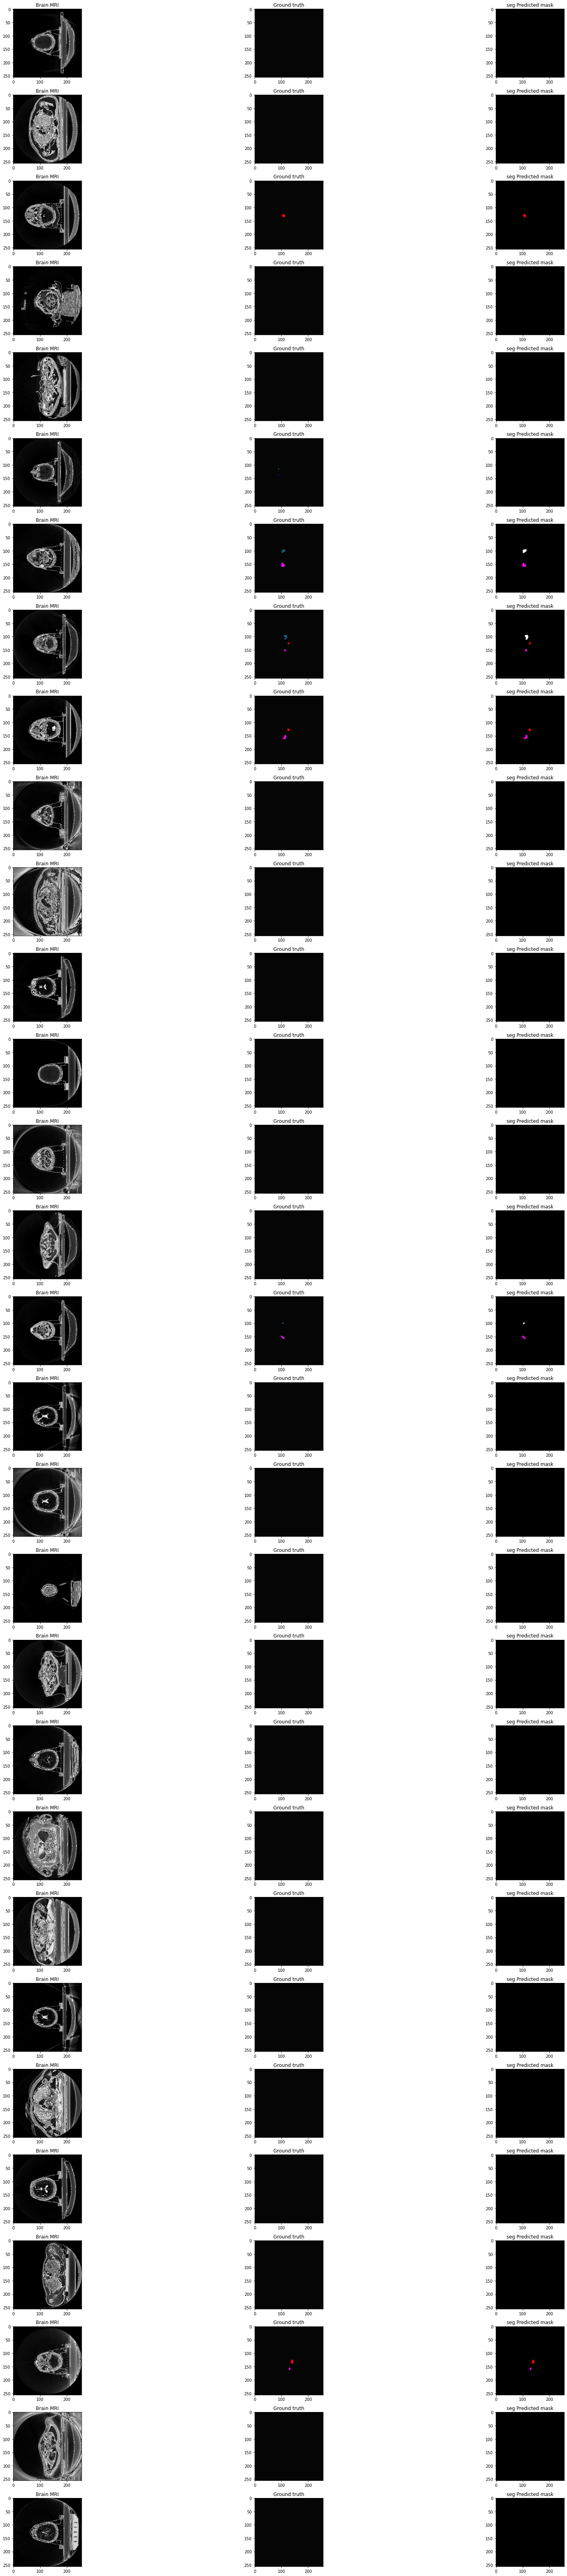

In [ ]:
count = 0
fig, axs = plt.subplots(30,3, figsize=(30,90))

for i in range(len(data)):
    if  count<30:
        img = data.image[350+i]
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axs[count][0].imshow(img)
        axs[count][0].title.set_text('Brain MRI')
        
        mask = data.mask[350+i]
        axs[count][1].imshow(mask)
        axs[count][1].title.set_text('Ground truth')
        
        pred = np.array(data.predicted_mask[350+i]).squeeze().round()

        axs[count][2].imshow(pred)
        axs[count][2].title.set_text('seg Predicted mask')

        
        count +=1
    if (count==30):
        break
# plt.savefig('sg.png')
fig.tight_layout()    